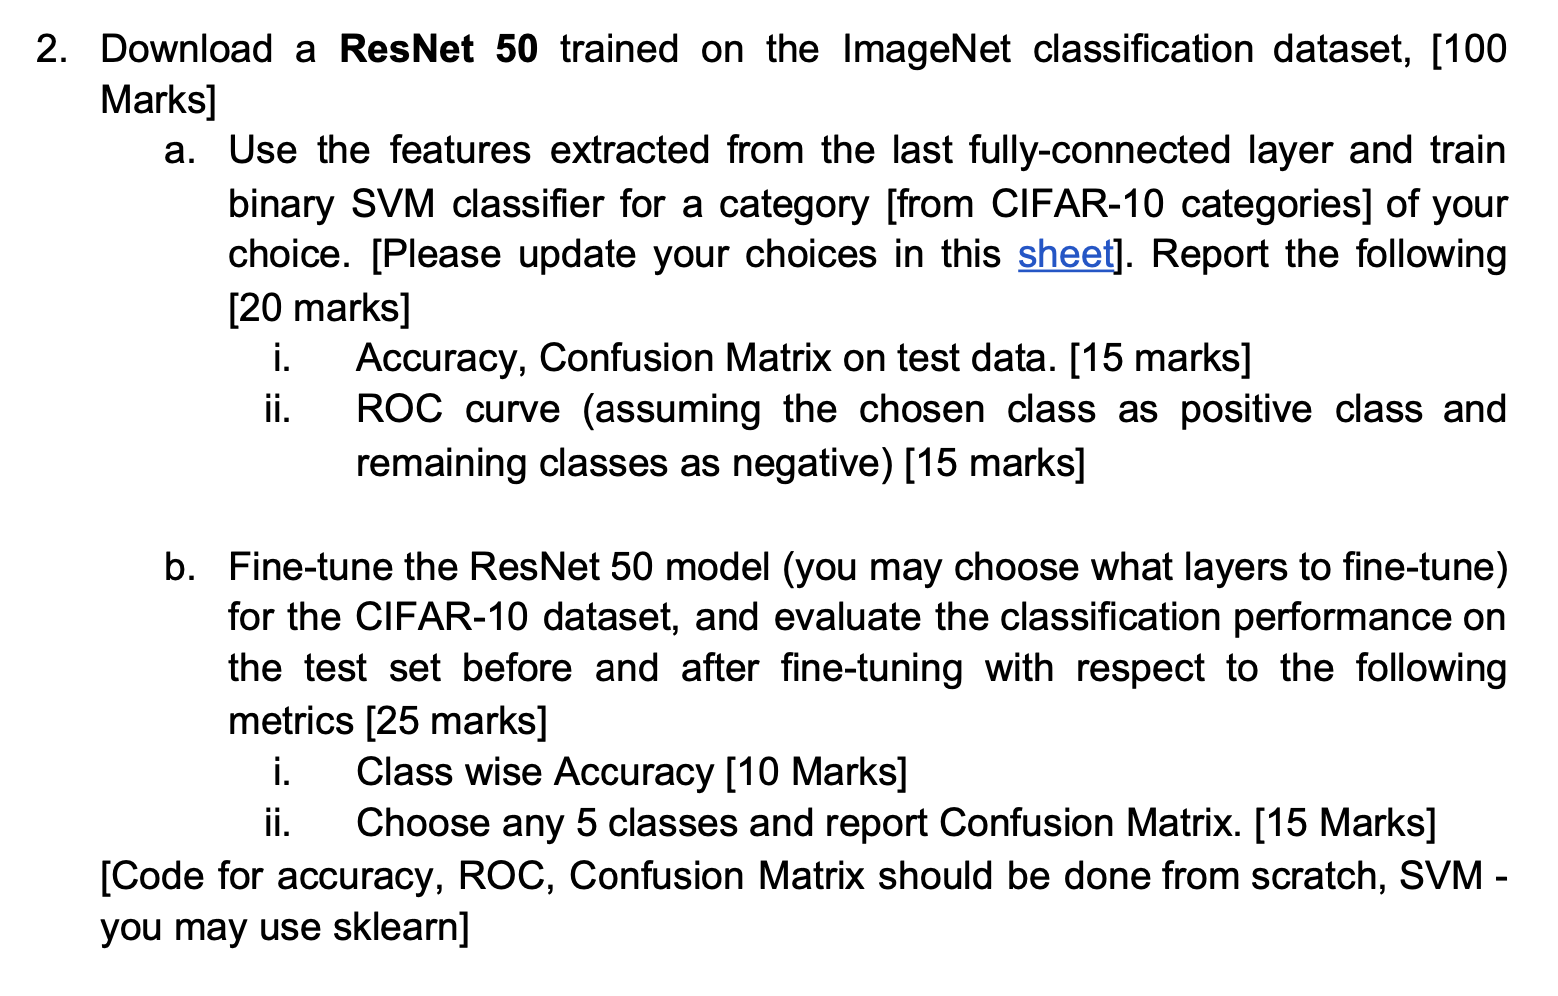

Choices Sheet Link - https://docs.google.com/spreadsheets/d/1AnVtuJz7K6vIuAnooIjv1L4MCguLn2-jqNQHoY5W_YA/edit#gid=0

In [1]:
# Download Resent 50 pretrained on imagenet
from google.colab import drive
from __future__ import print_function, division, absolute_import
import torchvision.models as models
import torch.nn.functional as F
import types
import re
# drive.mount('/content/gdrive')
# %cd /content/gdrive/My Drive/assignment_2_data
# !wget https://download.pytorch.org/models/resnet50-19c8e357.pth


In [2]:
# !ls
# pretrained_model = 'resnet50-19c8e357.pth'


In [3]:
# Download resnet 50 / pretrained model on imagenet
model = models.resnet50(pretrained=True)
# model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



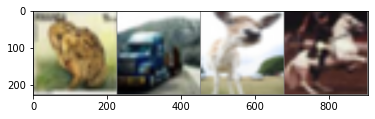

 frog truck  deer horse


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(size=(224, 224)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
it_train = iter(trainloader)
it_test = iter(testloader)
# first = next(it)
# second = next(it)
print(len(it_train))
print(len(it_test))

12500
2500


In [6]:
# Checking and Setting data and labels
for i, (data, labels) in enumerate(trainloader):
  # print("Converting labels")
  # print(labels)
  print(data.shape)
  print(labels.shape)
  for j in range(4):
    print(data[i].shape)
    print(labels[i])    
  break


torch.Size([4, 3, 224, 224])
torch.Size([4])
torch.Size([3, 224, 224])
tensor(6)
torch.Size([3, 224, 224])
tensor(6)
torch.Size([3, 224, 224])
tensor(6)
torch.Size([3, 224, 224])
tensor(6)


In [7]:
# Setting Train Labels
ytrain = []
for i, (data, labels) in enumerate(trainloader):
  # print("Converting labels")
  # print(labels) # tensor
  labels = labels.numpy()
  # print(labels) # Numpy array
  for j in range(4):
    if(labels[j]!=6):
      labels[j]=0
    else:
      labels[j]=1
  # print("Converted labels")
  # print(labels)
  ytrain.append(labels)
  
  # break
print(np.array(ytrain).shape)


(12500, 4)


In [8]:

# Setting Test Labels
ytest = []
for i, (test_data, test_labels) in enumerate(testloader):
  # print("Converting labels")
  # print(labels) # tensor
  test_labels = test_labels.numpy()
  # print(labels) # Numpy array
  for j in range(4):
    if(test_labels[j]!=6):
      test_labels[j]=0
    else:
      test_labels[j]=1
  # print("Converted labels")
  # print(labels)
  ytest.append(test_labels)
  
  # break
print(np.array(ytest).shape)



  

(2500, 4)


In [9]:
# Checking labels
# Setting Labels
for i in range(len(ytrain)):
  print("Train labels")
  print(ytrain)
  break

for i in range(len(ytest)):
  print("Test labels")
  print(ytest)
  break

Train labels
[array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 1, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 1, 0, 0]), array([0, 1, 0, 0]), array([0, 0, 1, 0]), array([0, 0, 0, 0]), array([1, 0, 1, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 1, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 0]), array([0, 1, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 1, 0]), array([0, 0, 0, 1]), array([1, 0, 0, 0]), array([0, 1, 0, 0]), array([0, 0, 1, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 0]), array([1, 1, 0, 1]), array([0, 0, 1, 0]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 1]), array([0, 0, 0, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 1, 0]), array([0, 0, 0, 0]),

In [10]:
# Also checking for the loaders
for i, (data, labels) in enumerate(trainloader):
  print(labels)
  for j in range(4):
    print(labels[j])

  break
# This tensors values are not updated but we have our array with us for modified train and test labels

tensor([2, 2, 9, 2])
tensor(2)
tensor(2)
tensor(9)
tensor(2)


In [11]:
# lets make xtrain,ytrain and xtest,ytest

xtrain = []
ytrain = ytrain
xtest = []
ytest = ytest



In [ ]:
# CRASHING HERE
# Please dont crash!!!!
for i, (data, labels) in enumerate(trainloader):
  # print(data.shape)
    xtrain.append(data.numpy())


In [ ]:
for i, (data, labels) in enumerate(testloader):
  # print(data.shape)
  xtest.append(data.numpy())


  

In [ ]:
print(len(xtrain))
print(len(xtest))

In [ ]:
print(np.array(xtrain).shape)
print(np.array(ytrain).shape)
print(np.array(xtest).shape)
print(np.array(ytest).shape)


In [ ]:
print(np.array(xtrain).reshape(12500*4,3,224,224).shape)
print(np.array(ytrain).reshape(12500*4).shape)
print(np.array(xtest).reshape(2500*4,3,224,224).shape)
print(np.array(ytest).reshape(2500*4).shape)

In [ ]:
# model
if torch.cuda.is_available():
    model.cuda()

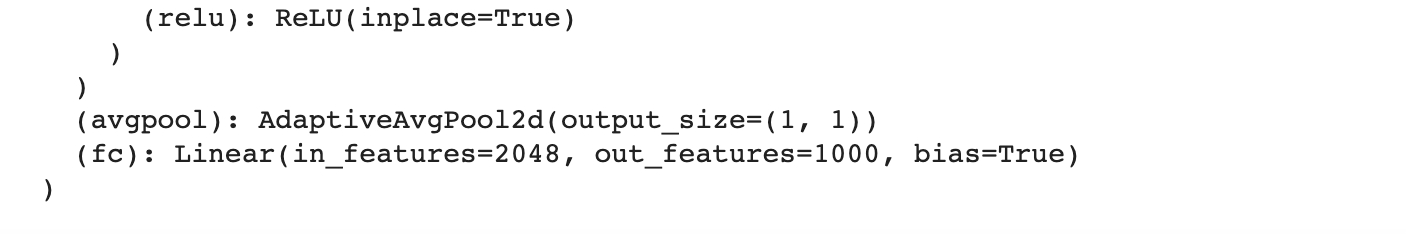

In [ ]:
# feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
# x = torch.randn([1,3,224,224])
# output = feature_extractor(x) # output now has the features corresponding to input x
# # print(output.shape)
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
# print(feature_extractor)


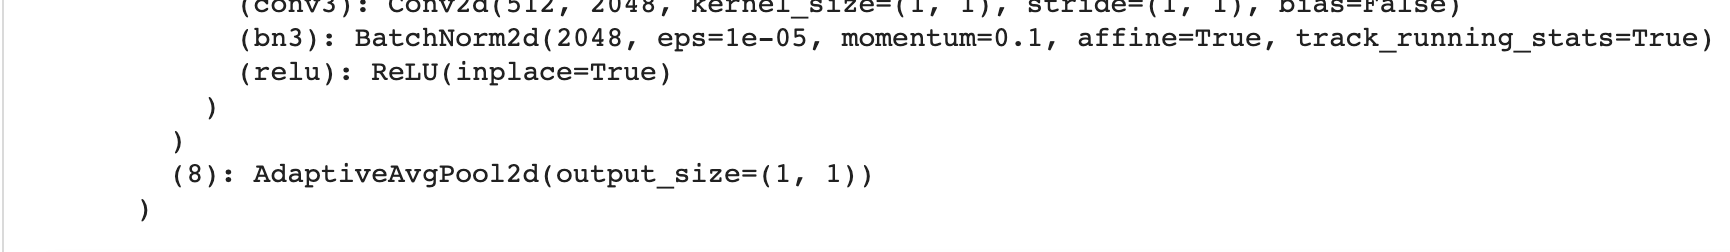

Transfer Learning has proved a tremendous advantage to a broader society of researcher. Using transfer learning we are able to use powerful features of large networks such that, it **enales** us to use deep learning techniques from large CNN architectures. AlexNet, ResNet etc.

Transfer learning dont only transfer weights, but also architecture. You have following choices:

1. You can use weights + Architectures
2. You can use weights only
3. You can use Architectures only

This works like as if you were having a function of pretrained model and from the last layer you are fetching the features by passing the "X" values to that function. And function can be anything like ReLU(W(W(..x)+b)+b)

Now question comes How does this work? weights are learned for targeted classes. (In our case we had 1000 classes from resnet, and we have selected only 1 class from cifar10 Autombile). We fix the parameter before the last fc layer and add our classifiaction task in the last. This will make the last FC layer to connect with only 2 classes (0 and 1) instead of connecting with all the 1000 classes of imagenet. Moreover, this will not bring classification unless we add some classification layer. 

The underlying principle works on the fundamentals of neural network. In order to learn features, neural network learns small features in the early layers and then with the subsequent layer it makes some images and feature maps. (as following figure). 

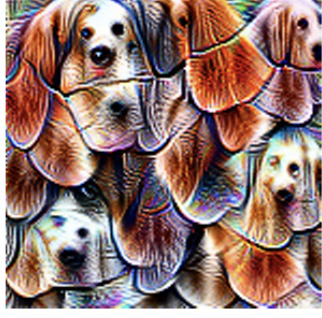

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
example = torch.tensor(xtrain[0])
output = feature_extractor(example.to(device))
print(output.shape)

In [ ]:


# xtrain = np.array(xtrain).reshape(12500*4,3,32,32)
# ytrain = np.array(ytrain).reshape(12500*4)
# xtest = np.array(xtest).reshape(2500*4,3,32,32)
# ytest = np.array(ytest).reshape(2500*4)


In [ ]:
print(len(xtrain))
print(len(xtest))

In [ ]:
extracted_features_train = []
extracted_features_test = []
main_extracted_features_train = []
main_extracted_features_test = []
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for batch in range(10):
  xtrain = xtrain[batch*1250:(batch+1)*1250]
  for i in range(len(xtrain)):
    img = torch.tensor(xtrain[i]).to(device)
    extracted_feature = feature_extractor(img)
    extracted_features_train.append(extracted_feature)
  main_extracted_features_train.append(extracted_features_train)  
print(np.array(main_extracted_features_train).shape)


for batch_test in range(10):
  xtest = xtest[batch_test*250:(batch_test+1)*250]
  for j in range(len(xtest)):
    img = torch.tensor(xtest[j]).to(device)
    extracted_feature = feature_extractor(img)
    extracted_features_test.append(extracted_feature)
  main_extracted_features_test.append(extracted_features_test)  
print(np.array(main_extracted_features_test).shape)

In [ ]:
main_extracted_features_train = np.array(main_extracted_features_train).reshape(10*1250)
main_extracted_features_test = np.array(main_extracted_features_test).reshape(10*250)

In [ ]:
print(main_extracted_features_train.shape)
print(main_extracted_features_test.shape)

In [ ]:
print(np.array(ytrain).shape)

In [ ]:
print(np.array(ytest).shape)

Now Lets reshape everything we have and then train the SVC

In [ ]:

for item in range(12500):
  main_extracted_features_train[item] = main_extracted_features_train[item].cpu().detach().numpy()
for itemt in range(2500):
  main_extracted_features_test[itemt] = main_extracted_features_test[itemt].cpu().detach().numpy()
print(main_extracted_features_train.shape)
print(main_extracted_features_test.shape)

In [ ]:
final_features_train = []
final_features_test = []
for i in range(12500):
  for j in range(4):
    final_features_train.append(main_extracted_features_train[i][j])

for i in range(2500):
  for j in range(4):
    final_features_test.append(main_extracted_features_test[i][j])

In [ ]:
print(np.array(final_features_train).shape)
print(np.array(final_features_test).shape)

In [ ]:
ytrain = np.array(ytrain).reshape(12500*4,)
ytest = np.array(ytest).reshape(2500*4,)

In [ ]:
X_train = np.array(final_features_train)
Y_train = np.array(ytrain)
X_test = np.array(final_features_test)
Y_test = np.array(ytest)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
from sklearn.utils import shuffle
# X = [[1,2,3,4],[2,3,6,7,8],[10,11]]
# y = [4,8,11]
# X, y = shuffle(X, y, random_state=0)
# print(X)
# print(y)

X_train, Y_train = shuffle(X_train, Y_train, random_state=0)
X_test, Y_test = shuffle(X_test, Y_test, random_state=0)

In [ ]:
X_train = X_train[:,:,0,0]
X_test = X_test[:,:,0,0]

Phew! Lets Make SVClassifier!

In [ ]:
from sklearn import svm

classifier = svm.SVC(probability=True, cache_size=1000)
classifier.fit(X_train, Y_train)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, Y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, Y_pred))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))
print("Classification report")
print(classification_report(Y_test,Y_pred))

In [ ]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

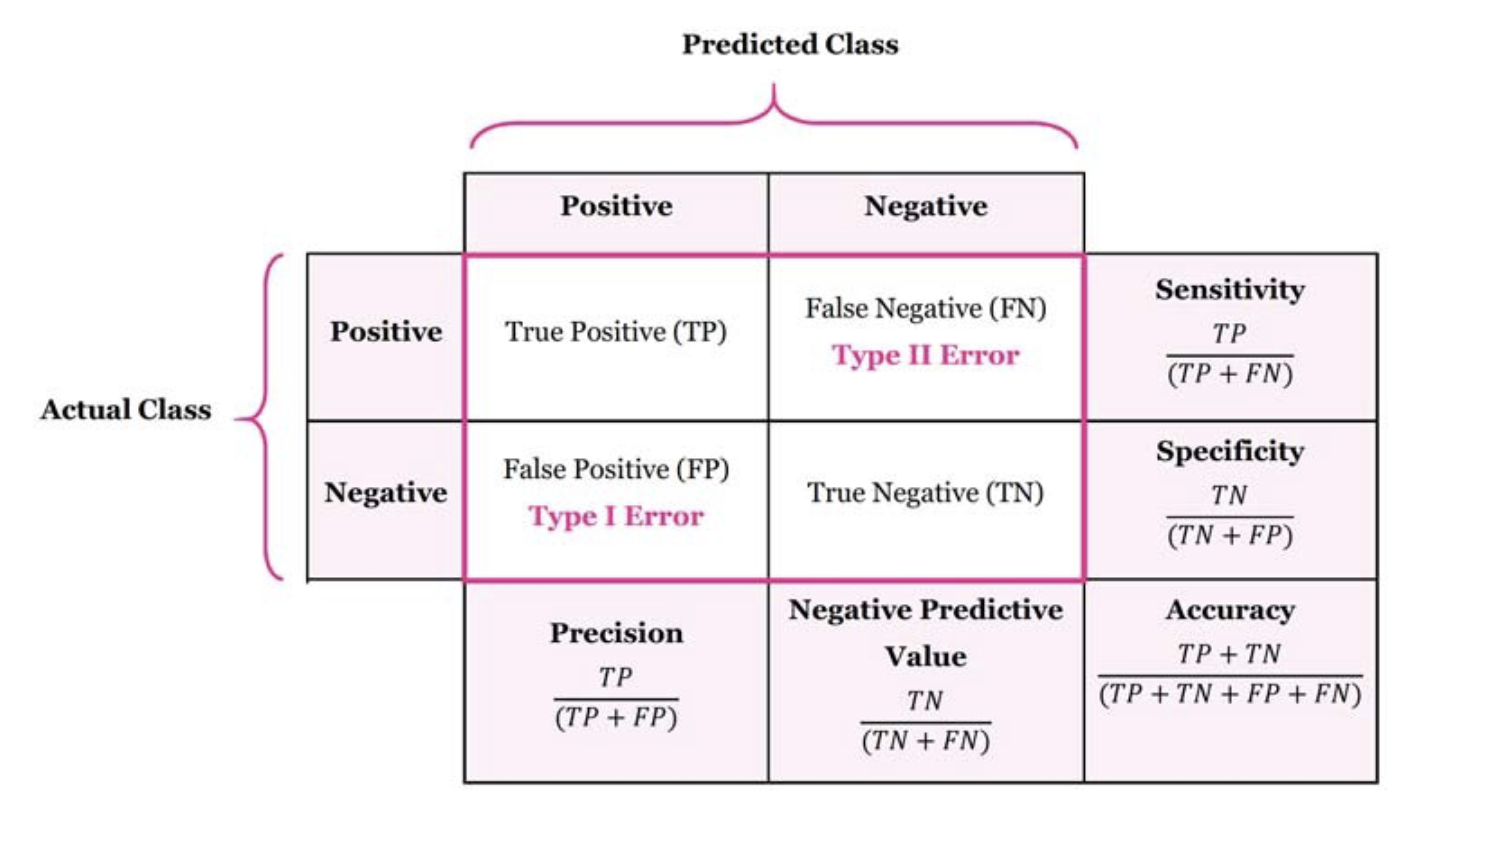

Not using inbuilt functions /  From Scratch

In [ ]:
# Confusion matrix
rows, cols = (2, 2)
labels = np.array([0,1])
# arr = [[0]*cols]*rows 
arr = np.zeros((len(labels), len(labels)))
for i in range(rows):
  for j in range(cols):
    arr[i,j] = np.sum((Y_test == labels[i]) & (Y_pred == labels[j]))  

np.array(arr).T

In [ ]:
# Accuracy

correct = 0
for i in range(len(Y_test)):
  if Y_test[i] == Y_pred[i]:
    correct += 1
print( correct / float(len(Y_test)) * 100.0)

In [ ]:
# ROC Curve
# ref: to code beyond this,I referred. specially the threshold part. 
#hence referred GitHub Repo: The notebook link: 
# https://github.com/tejas2454/Bias-Detection-and-Mitigation-Trusted-AI/blob/master/MNIST%20Bias%20detecton%20ROC%20scratch%20code.ipynb

In [ ]:
# ROC Curve
prb = classifier.predict_proba(X_test)
print(prb.shape)
prb
plt.plot(prb)
print(prb[0])
prb=prb[:,0]
roc=np.concatenate((Y_test.astype(int),Y_pred,prb),axis=1)
print(roc)
aeroplane = []
other_classes = []
for i in range(len(roc)):
  if (roc[i,0]==1):
    other_classes.append(roc[i,:])
  else:
    aeroplane.append(roc[i,:])

print("other_classes")
print(other_classes)
print('\n')
print("aeroplane")
print(aeroplane)

thresh=np.unique(np.concatenate((np.asarray(other_classes)[:,-1],np.asarray(aeroplane)[:,-1]),axis=0))
thresh_matrix=np.sort(thresh[::-1].T).reshape((len(thresh),1))[::-1]
sequence_arr=np.concatenate((np.asarray(other_classes)[:,:],np.asarray(aeroplane)[:,:]),axis=0)


def tpr_fpr(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==0 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t)):
        fp+=1
      elif (arr[i,0]==1 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(tp/(tp+fn))
    x.append(fp/(tn+fp))
  return(x)

final_plot_roc=np.asarray(tpr_fpr(sequence_arr,thresh_matrix))
roc_ma=final_plot_roc.reshape((int(len(final_plot_roc)/2),2))
import matplotlib.pyplot as plt
plt.title('ROC Curve for SVM Training Data')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.plot(roc_ma[:,1],roc_ma[:,0],'r')   
plt.show()